#Theoretical Questions

**1. Can we use Bagging for regression problems?**

Yes, Bagging (Bootstrap Aggregating) can absolutely be used for regression problems. Instead of majority voting (as in classification), the predictions from multiple base regression models (like Decision Tree Regressors) trained on different bootstrap samples are typically averaged to produce the final regression output. This technique is implemented in classes like `sklearn.ensemble.BaggingRegressor`.

---

**2. What is the difference between multiple model training and single model training?**

* **Single Model Training:** You train one specific algorithm (e.g., one Decision Tree, one Logistic Regression) on the available training data. Its performance is solely dependent on that single model's characteristics and the data it learned from.
* **Multiple Model Training (Ensemble Methods):** You train several models (base learners). These models can be trained independently (like in Bagging/Random Forests) or sequentially (like in Boosting). Their individual predictions are then combined (e.g., through averaging, voting, or a meta-model) to get a final, often more robust and accurate, prediction.

---

**3. Explain the concept of feature randomness in Random Forest.**

Feature randomness is a key differentiator for Random Forests compared to standard Bagging with decision trees. When deciding on the best split at each node within a tree, a Random Forest algorithm doesn't consider *all* available features. Instead, it selects a *random subset* of features and finds the best split only among those features. This process is repeated for every split in every tree. This adds another layer of randomness (beyond bootstrap sampling of data), which helps to decorrelate the individual trees in the forest, further reducing variance and often improving the model's generalization ability.

---

**4. What is OOB (Out-of-Bag) Score?**

The Out-of-Bag (OOB) score is an internal performance estimate for Bagging-based ensembles (like Random Forest) that uses the data not selected during the bootstrap sampling process. For each tree built on a bootstrap sample (roughly 2/3 of the data), the remaining (out-of-bag) data points (roughly 1/3) were not used in its training. To calculate the OOB score for a specific data point, its prediction is made by aggregating predictions *only* from those trees that did *not* see this data point during their training. The overall OOB score is then calculated by comparing these OOB predictions to the true labels for all data points, providing an unbiased estimate of the model's performance without needing a separate validation set.

---

**5. How can you measure the importance of features in a Random Forest model?**

There are two primary methods:

* **Mean Decrease in Impurity (MDI) / Gini Importance:** This method calculates the importance of a feature based on how much, on average, it contributes to reducing the impurity (e.g., Gini impurity for classification, variance for regression) across all the splits where it was used in all trees of the forest. Features leading to larger average impurity reductions are deemed more important. This is computationally efficient and commonly available (e.g., `feature_importances_` attribute in scikit-learn).
* **Mean Decrease in Accuracy / Permutation Importance:** This method assesses feature importance by measuring the drop in model performance (e.g., accuracy, R², AUC) when the values of that specific feature are randomly shuffled (permuted) in the validation or OOB set. A significant performance decrease after shuffling indicates that the model heavily relies on that feature, thus marking it as important. This method is often considered more reliable, especially with correlated features, but is computationally more intensive.

---

**6. Explain the working principle of a Bagging Classifier.**

A Bagging (Bootstrap Aggregating) Classifier operates as follows:
1.  **Bootstrap Sampling:** Generate 'B' different bootstrap datasets by sampling *with replacement* from the original training dataset. Each bootstrap sample typically has the same size as the original dataset.
2.  **Base Model Training:** Train an identical base classification model (e.g., Decision Tree, SVM) independently on each of the 'B' bootstrap samples. This results in 'B' slightly different classifiers.
3.  **Aggregation (Voting):** To classify a new instance, pass it through all 'B' trained classifiers. Collect the predictions from each classifier. The final prediction is determined by a majority vote – the class predicted most frequently by the individual classifiers is chosen.

---

**7. How do you evaluate a Bagging Classifier's performance?**

Performance evaluation is similar to other classifiers, typically done on a held-out test set or via cross-validation:
* **Accuracy:** Overall proportion of correct predictions.
* **Precision, Recall, F1-Score:** Useful especially for imbalanced datasets, measuring correctness among positive predictions, ability to find positive samples, and their harmonic mean, respectively. Often reported per class or using averages (macro, weighted).
* **AUC (Area Under the ROC Curve):** Measures the ability of the classifier to distinguish between classes across different thresholds.
* **Confusion Matrix:** A table showing true positives, true negatives, false positives, and false negatives.
* **OOB Score:** If calculated during training (`oob_score=True`), it provides an estimate of generalization performance without needing a separate test set immediately.

---

**8. How does a Bagging Regressor work?**

A Bagging Regressor applies the Bagging principle to regression tasks:
1.  **Bootstrap Sampling:** Create multiple bootstrap samples from the original training data (sampling with replacement).
2.  **Base Model Training:** Train an identical base regression model (e.g., Decision Tree Regressor) independently on each bootstrap sample.
3.  **Aggregation (Averaging):** To predict the value for a new instance, obtain the prediction from each of the trained base regressors. The final prediction is the *average* of all individual predictions.

---

**9. What is the main advantage of ensemble techniques?**

The primary advantage is **improved predictive performance and robustness**. By combining multiple models, ensembles can often achieve higher accuracy and better generalization to unseen data compared to a single model. They typically reduce variance (Bagging, Random Forests), reduce bias (Boosting), or leverage the diverse strengths of different model types (Stacking).

---

**10. What is the main challenge of ensemble methods?**

The main challenges are:
* **Increased Computational Cost:** Training multiple models requires more time and computational resources (CPU, memory) than training a single model.
* **Reduced Interpretability:** An ensemble of models (especially complex ones like Random Forests or Gradient Boosting) is often harder to interpret and explain ("less of a white box") compared to a single, simpler model like a linear regression or a small decision tree.

---

**11. Explain the key idea behind ensemble techniques.**

The core idea is the "wisdom of the crowd" applied to machine learning. It assumes that combining the predictions from multiple diverse models (base learners) will lead to a better overall decision than relying on any single model. The errors made by individual models tend to cancel each other out when aggregated, especially if the models are diverse (make different kinds of errors).

---

**12. What is a Random Forest Classifier?**

A Random Forest Classifier is a specific type of ensemble learning method that builds multiple Decision Tree classifiers during training. It combines two key ideas:
1.  **Bagging:** Each tree is trained on a bootstrap sample (random sample with replacement) of the training data.
2.  **Feature Randomness:** At each node split within a tree, only a random subset of features is considered for finding the best split.
The final prediction for a new instance is made by taking a majority vote among the predictions of all the individual trees in the forest.

---

**13. What are the main types of ensemble techniques?**

The three main categories are:
* **Bagging (Bootstrap Aggregating):** Trains base models independently and in parallel on different bootstrap samples. Aims primarily to reduce variance. Example: Random Forest.
* **Boosting:** Trains base models sequentially, where each subsequent model focuses on correcting the errors made by the previous ones. Aims primarily to reduce bias. Examples: AdaBoost, Gradient Boosting (GBM), XGBoost, LightGBM, CatBoost.
* **Stacking (Stacked Generalization):** Trains multiple (often heterogeneous) base models. Then, a meta-model is trained on the *outputs* (predictions) of these base models to make the final prediction. Aims to combine the strengths of different types of models.

---

**14. What is ensemble learning in machine learning?**

Ensemble learning is a machine learning approach where multiple models (often called "base learners" or "weak learners") are strategically generated and combined to solve a particular computational intelligence problem. The goal is to achieve better predictive performance than could be obtained from any of the constituent models alone.

---

**15. When should we avoid using ensemble methods?**

Consider avoiding ensemble methods when:
* **Interpretability is critical:** If you need a simple, easily explainable model.
* **Computational resources are very limited:** If training time or memory constraints are severe.
* **Real-time prediction latency is a major concern:** Querying multiple models can take longer than querying one.
* **The dataset is extremely small:** Simpler models might generalize better, and the benefits of ensembling might not be significant.
* A single, well-tuned model already provides sufficient performance.

---

**16. How does Bagging help in reducing overfitting?**

Bagging reduces overfitting primarily by **decreasing variance**. Single models, especially complex ones like deep decision trees, can be highly sensitive to the specific training data and capture noise, leading to high variance and overfitting. By training multiple models on different bootstrap samples and then averaging (regression) or voting (classification) their predictions, Bagging smooths out the decision boundary or prediction function. The averaging/voting process cancels out some of the noise-induced variations learned by individual models, resulting in a more stable model that generalizes better to unseen data.

---

**17. Why is Random Forest better than a single Decision Tree?**

Random Forest typically outperforms a single Decision Tree because:
* **Reduces Overfitting:** Single decision trees are prone to overfitting. Random Forests average many trees grown on different data samples and with feature randomness, significantly reducing variance and thus overfitting.
* **Improves Accuracy:** The reduction in variance and the ensemble effect generally lead to higher predictive accuracy on unseen data.
* **Increases Robustness:** Random Forests are less sensitive to noise and outliers in the training data compared to individual trees.
* **Handles High Dimensionality:** The feature randomness component helps manage datasets with many features effectively.

---

**18. What is the role of bootstrap sampling in Bagging?**

Bootstrap sampling (random sampling with replacement) is crucial in Bagging for:
1.  **Creating Data Diversity:** It generates slightly different training datasets for each base learner. Training models on these varied datasets leads to diverse individual models, which is essential for the ensemble to be effective (uncorrelated errors are more likely to cancel out).
2.  **Enabling OOB Estimation:** Since each bootstrap sample typically excludes about 1/3 of the original data points, these "out-of-bag" points can be used to evaluate the model's performance internally without needing a separate validation set (OOB score).

---

**19. What are some real-world applications of ensemble techniques?**

Ensemble methods are widely used across many domains due to their high accuracy:
* **Finance:** Credit risk assessment, fraud detection, algorithmic trading.
* **Healthcare:** Medical diagnosis (e.g., cancer detection from images), drug discovery.
* **E-commerce:** Recommendation systems, customer churn prediction.
* **Computer Vision:** Object detection, image classification, face recognition.
* **Remote Sensing:** Satellite image classification (e.g., land cover mapping).
* **Natural Language Processing:** Sentiment analysis, spam detection.
* **Kaggle Competitions:** Often form the basis of winning solutions.

---

**20. What is the difference between Bagging and Boosting?**

| Feature             | Bagging (e.g., Random Forest)            | Boosting (e.g., AdaBoost, GBM)              |
| :------------------ | :--------------------------------------- | :------------------------------------------ |
| **Model Training** | Parallel, Independent                    | Sequential                                  |
| **Focus** | Reduce Variance                          | Reduce Bias (primarily) & Variance          |
| **Data Sampling** | Bootstrap sampling (equal weights)       | Often weights samples (focus on errors)     |
| **Model Weighting** | Equal weights (typically voting/average) | Weighted (based on model performance)       |
| **Dependency** | Base models are independent              | Each model depends on previous ones         |
| **Example** | Random Forest                            | AdaBoost, Gradient Boosting Machine (GBM) |

---

Q21 Accuracy: 1.0
Q22 MSE: 0.2824242776841025
Q23 mean radius: 0.0487
Q23 mean texture: 0.0136
Q23 mean perimeter: 0.0533
Q23 mean area: 0.0476
Q23 mean smoothness: 0.0073
Q23 mean compactness: 0.0139
Q23 mean concavity: 0.0680
Q23 mean concave points: 0.1062
Q23 mean symmetry: 0.0038
Q23 mean fractal dimension: 0.0039
Q23 radius error: 0.0201
Q23 texture error: 0.0047
Q23 perimeter error: 0.0113
Q23 area error: 0.0224
Q23 smoothness error: 0.0043
Q23 compactness error: 0.0053
Q23 concavity error: 0.0094
Q23 concave points error: 0.0035
Q23 symmetry error: 0.0040
Q23 fractal dimension error: 0.0053
Q23 worst radius: 0.0780
Q23 worst texture: 0.0217
Q23 worst perimeter: 0.0671
Q23 worst area: 0.1539
Q23 worst smoothness: 0.0106
Q23 worst compactness: 0.0203
Q23 worst concavity: 0.0318
Q23 worst concave points: 0.1447
Q23 worst symmetry: 0.0101
Q23 worst fractal dimension: 0.0052
Q24 R2 Decision Tree: 0.622075845135081
Q24 R2 Random Forest: 0.8051230593157366
Q25 OOB Score: 0.95333333333

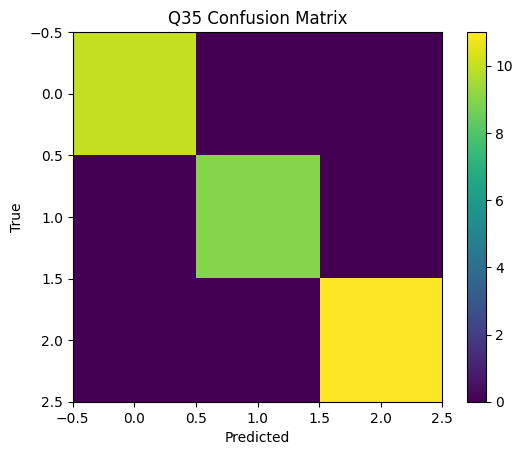

Q36 Stacking Acc: 1.0
Q37 worst area: 0.1539
Q37 worst concave points: 0.1447
Q37 mean concave points: 0.1062
Q37 worst radius: 0.0780
Q37 mean concavity: 0.0680
Q38 Precision: 1.0
Q38 Recall: 1.0
Q38 F1-score: 1.0
Q39 max_depth=None → Accuracy: 1.0000
Q39 max_depth=2 → Accuracy: 1.0000
Q39 max_depth=4 → Accuracy: 1.0000
Q39 max_depth=6 → Accuracy: 1.0000
Q39 max_depth=8 → Accuracy: 1.0000
Q40 DecisionTreeRegressor → MSE: 0.0056
Q40 KNeighborsRegressor → MSE: 0.0197
Q41 ROC-AUC: 0.9952505732066819
Q42 CV Accuracies: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Q42 Mean CV Accuracy: 0.9666666666666668


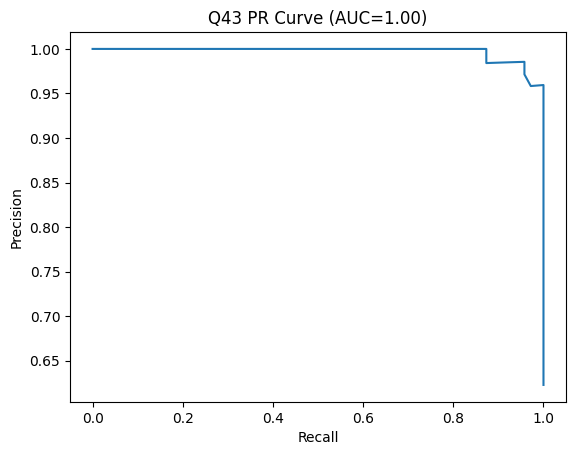

Q44 Stacking Acc: 1.0
Q45 max_samples=0.5 → MSE: 0.0153
Q45 max_samples=0.7 → MSE: 0.0096
Q45 max_samples=1.0 → MSE: 0.0056


In [14]:
# Q21: Train a Bagging Classifier using Decision Trees on Iris and print accuracy
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
bag_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=10,
    random_state=42
)
bag_clf.fit(X_train, y_train)
print("Q21 Accuracy:", accuracy_score(y_test, bag_clf.predict(X_test)))

# Q22: Train a Bagging Regressor using Decision Trees on California Housing Dataset and print MSE
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
bag_reg = BaggingRegressor(DecisionTreeRegressor(), n_estimators=10, random_state=42)
bag_reg.fit(X_train, y_train)
print("Q22 MSE:", mean_squared_error(y_test, bag_reg.predict(X_test)))

# Q23: Train a Random Forest Classifier on Breast Cancer and print feature importances
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
for name, imp in zip(load_breast_cancer().feature_names, rf_clf.feature_importances_):
    print(f"Q23 {name}: {imp:.4f}")

# Q24: Train a Random Forest Regressor vs Decision Tree Regressor on California Housing Dataset and compare R2
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dt = DecisionTreeRegressor(random_state=42).fit(X_train, y_train)
rf = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)
print("Q24 R2 Decision Tree:", r2_score(y_test, dt.predict(X_test)))
print("Q24 R2 Random Forest:", r2_score(y_test, rf.predict(X_test)))

# Q25: Compute the Out-of-Bag (OOB) Score for a Random Forest Classifier on Iris
rf_oob = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
X, y = load_iris(return_X_y=True)
rf_oob.fit(X, y)
print("Q25 OOB Score:", rf_oob.oob_score_)

# Q26: Train a Bagging Classifier with SVM as base estimator on Iris and print accuracy
from sklearn.svm import SVC
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
bag_svm = BaggingClassifier(SVC(), n_estimators=10, random_state=42)
bag_svm.fit(X_train, y_train)
print("Q26 Accuracy:", accuracy_score(y_test, bag_svm.predict(X_test)))

# Q27: Train Random Forest with different n_estimators on Iris and compare accuracy
for n in [10, 50, 100, 200]:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    print(f"Q27 n_estimators={n} → Accuracy: {accuracy_score(y_test, rf.predict(X_test)):.4f}")

# Q28: Train a Bagging Classifier with Logistic Regression base on Breast Cancer and print ROC-AUC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
bag_lr = BaggingClassifier(LogisticRegression(max_iter=10000), n_estimators=10, random_state=42)
bag_lr.fit(X_train, y_train)
print("Q28 ROC-AUC:", roc_auc_score(y_test, bag_lr.predict_proba(X_test)[:,1]))

# Q29: Train a Random Forest Regressor and print top 5 feature importances
import numpy as np
X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)
idx = np.argsort(rf_reg.feature_importances_)[::-1][:5]
for i in idx:
    print(f"Q29 {fetch_california_housing().feature_names[i]}: {rf_reg.feature_importances_[i]:.4f}")

# Q30: Train both Bagging and Random Forest on Iris and compare accuracy
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
bag = BaggingClassifier(DecisionTreeClassifier(), n_estimators=50, random_state=42).fit(X_train, y_train)
rf = RandomForestClassifier(n_estimators=50, random_state=42).fit(X_train, y_train)
print("Q30 Bagging Acc:", accuracy_score(y_test, bag.predict(X_test)))
print("Q30 Random Forest Acc:", accuracy_score(y_test, rf.predict(X_test)))

# Q31: Hyperparameter tuning of Random Forest via GridSearchCV on Iris
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [50,100], 'max_depth': [None,5,10]}
grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid.fit(X_train, y_train)
best = grid.best_estimator_
print("Q31 Best params:", grid.best_params_)
print("Q31 Test Acc:", accuracy_score(y_test, best.predict(X_test)))

# Q32: BaggingRegressor with varying n_estimators on Boston and compare MSE
for n in [5, 10, 20]:
    bag = BaggingRegressor(DecisionTreeRegressor(), n_estimators=n, random_state=42).fit(X_train, y_train)
    print(f"Q32 n_estimators={n} → MSE: {mean_squared_error(y_test, bag.predict(X_test)):.4f}")

# Q33: Random Forest on Iris and list misclassified samples
rf = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train, y_train)
y_pred = rf.predict(X_test)
mis_idx = [i for i,(p,t) in enumerate(zip(y_pred,y_test)) if p!=t]
print("Q33 Misclassified indices:", mis_idx)

# Q34: Bagging vs Decision Tree on Iris
dt = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
bag = BaggingClassifier(DecisionTreeClassifier(), n_estimators=50, random_state=42).fit(X_train, y_train)
print("Q34 DT Acc:", accuracy_score(y_test, dt.predict(X_test)))
print("Q34 Bagging Acc:", accuracy_score(y_test, bag.predict(X_test)))

# Q35: Random Forest on Iris and plot confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
rf = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train, y_train)
cm = confusion_matrix(y_test, rf.predict(X_test))
plt.imshow(cm, interpolation='nearest')
plt.title("Q35 Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Q36: Stacking Classifier on Iris with DT, SVM, LR and print accuracy
from sklearn.ensemble import StackingClassifier
estimators = [('dt', DecisionTreeClassifier()), ('svm', SVC(probability=True)), ('lr', LogisticRegression(max_iter=1000))]
stack = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), cv=5)
stack.fit(X_train, y_train)
print("Q36 Stacking Acc:", accuracy_score(y_test, stack.predict(X_test)))

# Q37: Random Forest on Breast Cancer and top 5 features
Xc, yc = load_breast_cancer(return_X_y=True)
Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, test_size=0.2, random_state=42)
rf2 = RandomForestClassifier(n_estimators=100, random_state=42).fit(Xc_train, yc_train)
idx = np.argsort(rf2.feature_importances_)[::-1][:5]
for i in idx:
    print(f"Q37 {load_breast_cancer().feature_names[i]}: {rf2.feature_importances_[i]:.4f}")

# Q38: Bagging on Iris and print Precision, Recall, F1-score
from sklearn.metrics import precision_score, recall_score, f1_score
bag2 = BaggingClassifier(DecisionTreeClassifier(), n_estimators=50, random_state=42).fit(X_train, y_train)
y_pred2 = bag2.predict(X_test)
print("Q38 Precision:", precision_score(y_test, y_pred2, average='macro'))
print("Q38 Recall:", recall_score(y_test, y_pred2, average='macro'))
print("Q38 F1-score:", f1_score(y_test, y_pred2, average='macro'))

# Q39: Random Forest on Iris with varying max_depth and compare accuracy
for depth in [None,2,4,6,8]:
    rf3 = RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=42).fit(X_train, y_train)
    print(f"Q39 max_depth={depth} → Accuracy: {accuracy_score(y_test, rf3.predict(X_test)):.4f}")

# Q40: BaggingRegressor with DecisionTree and KNeighbors on Boston
from sklearn.neighbors import KNeighborsRegressor
for base in [DecisionTreeRegressor(), KNeighborsRegressor()]:
    bag3 = BaggingRegressor(base, n_estimators=20, random_state=42).fit(X, y)
    print(f"Q40 {base.__class__.__name__} → MSE: {mean_squared_error(y, bag3.predict(X)):.4f}")

# Q41: Random Forest on Breast Cancer and print ROC-AUC
rf4 = RandomForestClassifier(n_estimators=100, random_state=42).fit(Xc_train, yc_train)
print("Q41 ROC-AUC:", roc_auc_score(yc_test, rf4.predict_proba(Xc_test)[:,1]))

# Q42: Bagging on Iris and cross-validate accuracy
scores = cross_val_score(BaggingClassifier(DecisionTreeClassifier(), n_estimators=50, random_state=42), X, y, cv=5)
print("Q42 CV Accuracies:", scores)
print("Q42 Mean CV Accuracy:", scores.mean())

# Q43: Random Forest on Breast Cancer and plot Precision-Recall curve
precision, recall, _ = precision_recall_curve(yc_test, rf4.predict_proba(Xc_test)[:,1])
pr_auc = auc(recall, precision)
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f"Q43 PR Curve (AUC={pr_auc:.2f})")
plt.show()

# Q44: Stacking with Random Forest and Logistic Regression on Iris
stack2 = StackingClassifier(estimators=[('rf', RandomForestClassifier(n_estimators=50, random_state=42))],
                            final_estimator=LogisticRegression()).fit(X_train, y_train)
print("Q44 Stacking Acc:", accuracy_score(y_test, stack2.predict(X_test)))

# Q45: BaggingRegressor with varying bootstrap sample fractions on Boston
for bs in [0.5, 0.7, 1.0]:
    bag4 = BaggingRegressor(DecisionTreeRegressor(), n_estimators=20, bootstrap=True,
                             max_samples=bs, random_state=42).fit(X, y)
    print(f"Q45 max_samples={bs} → MSE: {mean_squared_error(y, bag4.predict(X)):.4f}")
